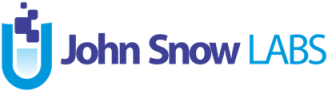

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/langtest/blob/main/demo/tutorials/llm_notebooks/HuggingFaceAPI_QA_Summarization_Testing_Notebook.ipynb)

**LangTest** is an open-source python library designed to help developers deliver safe and effective Natural Language Processing (NLP) models. Whether you are using **John Snow Labs, Hugging Face, Spacy** models or **OpenAI, Cohere, AI21, Hugging Face Inference API and Azure-OpenAI** based LLMs, it has got you covered. You can test any Named Entity Recognition (NER), Text Classification, fill-mask, Translation model using the library. We also support testing LLMS for Question-Answering, Summarization and text-generation tasks on benchmark datasets. The library supports 60+ out of the box tests. For a complete list of supported test categories, please refer to the [documentation](http://langtest.org/docs/pages/docs/test_categories).

Metrics are calculated by comparing the model's extractions in the original list of sentences against the extractions carried out in the noisy list of sentences. The original annotated labels are not used at any point, we are simply comparing the model against itself in a 2 settings.

# Getting started with LangTest

In [ ]:
!pip install "langtest[evaluate,langchain,transformers]" 

# Harness and Its Parameters

The Harness class is a testing class for Natural Language Processing (NLP) models. It evaluates the performance of a NLP model on a given task using test data and generates a report with test results.Harness can be imported from the LangTest library in the following way.

In [ ]:
#Import Harness from the LangTest library
from langtest import Harness

It imports the Harness class from within the module, that is designed to provide a blueprint or framework for conducting NLP testing, and that instances of the Harness class can be customized or configured for different testing scenarios or environments.

Here is a list of the different parameters that can be passed to the Harness function:

<br/>


| Parameter  | Description |  
| - | - | 
|**task**     |Task for which the model is to be evaluated (question-answering or summarization)|
| **model**     | Specifies the model(s) to be evaluated. This parameter can be provided as either a dictionary or a list of dictionaries. Each dictionary should contain the following keys: <ul><li>model (mandatory): 	PipelineModel or path to a saved model or pretrained pipeline/model from hub.</li><li>hub (mandatory): Hub (library) to use in back-end for loading model from public models hub or from path</li></ul>|
| **data**      | The data to be used for evaluation. A dictionary providing flexibility and options for data sources. It should include the following keys: <ul><li>data_source (mandatory): The source of the data.</li><li>subset (optional): The subset of the data.</li><li>feature_column (optional): The column containing the features.</li><li>target_column (optional): The column containing the target labels.</li><li>split (optional): The data split to be used.</li><li>source (optional): Set to 'huggingface' when loading Hugging Face dataset.</li></ul> |
| **config**    | Configuration for the tests to be performed, specified in the form of a YAML file. |

<br/>
<br/>

# Model Testing from HuggingFace Hub For Question Answering

In this section, we dive into testing of HuggingFace Hub models in Question Answering task.

LangTest supports robustness tests for LLM testing for now.

### Set environment for HuggingFace Hub

In [ ]:
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "<API_TOKEN>"

## BoolQ-test-tiny dataset testing

### Setup and Configure Harness

In [ ]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "google/flan-t5-small","hub": "huggingface-inference-api"},
                  data={"data_source" :"BoolQ",
                        "split":"test-tiny"}
                  )

We have specified task as QA, hub as `huggingface-inference-api` and model as `google/flan-t5-small`, `google/flan-t5-xl`, `stabilityai/stablelm-tuned-alpha-3b`, or `databricks/dolly-v2-3b`.

For dataset we used `BoolQ` dataset and `test-tiny` split which includes 50 samples. Other available datasets are: [Benchmark Datasets](https://langtest.org/docs/pages/docs/data#question-answering)

For tests we used lowercase and uppercase. Other available robustness tests for QA task are:
* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

Available Bias tests for QA task are:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`

Available Representation tests for QA task are:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`


Available Accuracy tests for QA task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`


Available Fairness tests for QA task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

You can also set prompts and other model parameters in config. Possible parameters are:
* `user_promt:` Promt to be given to the model.
* `temperature:` Temperature of the model.
* `max_tokens:` Maximum number of output tokens allowed for model.

In [ ]:
harness.configure({
    'model_parameters': {
        'temperature': 0,
        'max_tokens': 64
    },
    
    'tests': {
      'defaults':{
        'min_pass_rate': 1.00
      },

      'robustness':{
        'lowercase': {'min_pass_rate': 0.70},
        'uppercase': {'min_pass_rate': 0.70}
      }
    }
})

Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.

➤ You can adjust the level of transformation in the sentence by using the "`prob`" parameter, which controls the proportion of words to be changed during robustness tests.

➤ **NOTE** : "`prob`" defaults to 1.0, which means all words will be transformed.
```
harness.configure(
{
 'tests': {
    'defaults': {'min_pass_rate': 0.65},
      'robustness': {
        'lowercase': {'min_pass_rate': 0.66, 'prob': 0.50}, 
        'uppercase':{'min_pass_rate': 0.60, 'prob': 0.70},
      }
  }
})

```


### Generating the test cases.

In [ ]:
harness.generate()

harness.generate() method automatically generates the test cases (based on the provided configuration)

In [ ]:
harness.testcases()

harness.testcases() method displays the produced test cases in form of a pandas data frame.

### Running the tests

In [ ]:
harness.run()

Called after harness.generate() and is to used to run all the tests.  Returns a pass/fail flag for each test.

In [ ]:
harness.generated_results()

This method returns the generated results in the form of a pandas dataframe, which provides a convenient and easy-to-use format for working with the test results. You can use this method to quickly identify the test cases that failed and to determine where fixes are needed.

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [ ]:
harness.report()

#### NQ-open-test dataset testing

We can also use another dataset, NQ-open for testing the model.

In [ ]:
harness = Harness(
                  task="question-answering", 
                  model={"model": "google/flan-t5-small","hub":"huggingface-inference-api"}, 
                  data={"data_source" :"NQ-open",
                        "split":"test-tiny"}
                  )

In [ ]:
harness.configure({
    'model_parameters': {
      'max_tokens': 64
    },
    'tests': {
      'defaults':{
        'min_pass_rate': 1.00
      },

      'robustness':{
        'lowercase': {'min_pass_rate': 0.70},
        'uppercase': {'min_pass_rate': 0.70}
      }
    }
})

In [ ]:
harness.generate()

In [ ]:
harness.testcases()

In [ ]:
harness.run()

In [ ]:
harness.generated_results()

In [ ]:
harness.report()

# HuggingFace Hub Model Testing For Summarization

In this section, we dive into testing of HuggingFace Hub models in Summarization task.

LangTest supports robustness tests for LLM testing for now.

## XSum-test-tiny dataset testing

### Setup and configure harness

In [ ]:
harness = Harness(
                  task="summarization", 
                  model={"model": "google/pegasus-newsroom", "hub":"huggingface-inference-api"}, 
                  data={"data_source" :"XSum",
                        "split":"test-tiny"}
                  )

We have specified task as Summarization, hub as `huggingface-inference-api` and any summarization model from huggingface model hub such as `google/pegasus-newsroom`, `facebook/bart-large-cnn`, `google/pegasus-cnn_dailymail`, `google/bigbird-pegasus-large-bigpatent` and many more.

For dataset we used XSum-test-tiny which includes 50 lines from XSum-test. Available datasets for summarization are:

* `XSum-test`
* `XSum-test-tiny`

For tests we used lowercase and uppercase. Other available robustness tests for summarization task are:

* `add_context`
* `add_contraction`
* `add_punctuation`
* `add_typo`
* `add_ocr_typo`
* `american_to_british`
* `british_to_american`
* `lowercase`
* `strip_punctuation`
* `titlecase`
* `uppercase`
* `number_to_word`
* `add_abbreviation`
* `add_speech_to_text_typo`
* `add_slangs`
* `dyslexia_word_swap`
* `multiple_perturbations`
* `adjective_synonym_swap`
* `adjective_antonym_swap`
* `strip_all_punctuation`

Available Bias tests for summarization task are:

* `replace_to_male_pronouns`
* `replace_to_female_pronouns`
* `replace_to_neutral_pronouns`
* `replace_to_high_income_country`
* `replace_to_low_income_country`
* `replace_to_upper_middle_income_country`
* `replace_to_lower_middle_income_country`
* `replace_to_white_firstnames`
* `replace_to_black_firstnames`
* `replace_to_hispanic_firstnames`
* `replace_to_asian_firstnames`
* `replace_to_white_lastnames`
* `replace_to_sikh_names`
* `replace_to_christian_names`
* `replace_to_hindu_names`
* `replace_to_muslim_names`
* `replace_to_inter_racial_lastnames`
* `replace_to_native_american_lastnames`
* `replace_to_asian_lastnames`
* `replace_to_hispanic_lastnames`
* `replace_to_black_lastnames`
* `replace_to_parsi_names`
* `replace_to_jain_names`
* `replace_to_buddhist_names`

Available Representation tests for summarization task are:

* `min_gender_representation_count`
* `min_ethnicity_name_representation_count`
* `min_religion_name_representation_count`
* `min_country_economic_representation_count`
* `min_gender_representation_proportion`
* `min_ethnicity_name_representation_proportion`
* `min_religion_name_representation_proportion`
* `min_country_economic_representation_proportion`


Available Accuracy tests for summarization task are:

* `min_exact_match_score`
* `min_bleu_score`
* `min_rouge1_score`
* `min_rouge2_score`
* `min_rougeL_score`
* `min_rougeLsum_score`


Available Fairness tests for summarization task are:

* `max_gender_rouge1_score`
* `max_gender_rouge2_score`
* `max_gender_rougeL_score`
* `max_gender_rougeLsum_score`
* `min_gender_rouge1_score`
* `min_gender_rouge2_score`
* `min_gender_rougeL_score`
* `min_gender_rougeLsum_score`

In [31]:
harness.configure(
{
 'tests': {'defaults': {'min_pass_rate': 0.65},
           'robustness': {'uppercase': {'min_pass_rate': 0.66}, 
                          'lowercase':{'min_pass_rate': 0.60},
                        }
          }
 }
 )

{'tests': {'defaults': {'min_pass_rate': 0.65},
  'robustness': {'uppercase': {'min_pass_rate': 0.66},
   'lowercase': {'min_pass_rate': 0.6}}}}

`Here we have configured the harness to perform two robustness tests (uppercase and lowercase) and defined the minimum pass rate for each test.`

### Generating the Test Cases

In [33]:
harness.generate()

Generating testcases...: 100%|██████████| 1/1 [00:00<?, ?it/s]


In [34]:
harness.testcases()

,category,test_type,original,test_case
0,robustness,uppercase,The ex-Reading defender denied fraudulent trad...,THE EX-READING DEFENDER DENIED FRAUDULENT TRAD...
1,robustness,uppercase,Voges was forced to retire hurt on 86 after su...,VOGES WAS FORCED TO RETIRE HURT ON 86 AFTER SU...
2,robustness,uppercase,Seven photographs taken in the Norfolk country...,SEVEN PHOTOGRAPHS TAKEN IN THE NORFOLK COUNTRY...
3,robustness,uppercase,"Chris Poole - known as ""moot"" online - created...","CHRIS POOLE - KNOWN AS ""MOOT"" ONLINE - CREATED..."
4,robustness,uppercase,Four police officers were injured in the incid...,FOUR POLICE OFFICERS WERE INJURED IN THE INCID...
5,robustness,uppercase,The injured pedestrian - a young man - is thou...,THE INJURED PEDESTRIAN - A YOUNG MAN - IS THOU...
6,robustness,uppercase,Barca will be investigated for alleged misappr...,BARCA WILL BE INVESTIGATED FOR ALLEGED MISAPPR...
7,robustness,uppercase,"The think tank said the city's 1,536 schools n...","THE THINK TANK SAID THE CITY'S 1,536 SCHOOLS N..."
8,robustness,lowercase,The ex-Reading defender denied fraudulent trad...,the ex-reading defender denied fraudulent trad...
9,robustness,lowercase,Voges was forced to retire hurt on 86 after su...,voges was forced to retire hurt on 86 after su...


### Running the tests

In [36]:
harness.run()

Running testcases... : 100%|██████████| 16/16 [01:46<00:00,  6.67s/it]


### Generated Results

In [39]:
harness.generated_results()

,category,test_type,original,test_case,expected_result,actual_result,eval_score,pass
0,robustness,uppercase,"The ex-Reading defender denied fraudulent trading charges relating to the Sodje Sports Foundation - a charity to raise money for Nigerian sport.\nMr Sodje, 37, is jointly charged with elder brothers Efe, 44, Bright, 50 and Stephen, 42.\nAppearing at the Old Bailey earlier, all four denied the offence.\nThe charge relates to offences which allegedly took place between 2008 and 2014.\nSam, from Kent, Efe and Bright, of Greater Manchester, and Stephen, from Bexley, are due to stand trial in July.\nThey were all released on bail.","THE EX-READING DEFENDER DENIED FRAUDULENT TRADING CHARGES RELATING TO THE SODJE SPORTS FOUNDATION - A CHARITY TO RAISE MONEY FOR NIGERIAN SPORT.\nMR SODJE, 37, IS JOINTLY CHARGED WITH ELDER BROTHERS EFE, 44, BRIGHT, 50 AND STEPHEN, 42.\nAPPEARING AT THE OLD BAILEY EARLIER, ALL FOUR DENIED THE OFFENCE.\nTHE CHARGE RELATES TO OFFENCES WHICH ALLEGEDLY TOOK PLACE BETWEEN 2008 AND 2014.\nSAM, FROM KENT, EFE AND BRIGHT, OF GREATER MANCHESTER, AND STEPHEN, FROM BEXLEY, ARE DUE TO STAND TRIAL IN JULY.\nTHEY WERE ALL RELEASED ON BAIL.","The ex-Reading defender denied fraudulent trading charges relating to the Sodje Sports Foundation - a charity to raise money for Nigerian sport. Mr Sodje, 37, is jointly charged with elder brothers Efe, 44, Bright, 50 and Stephen, 42. Appearing at the Old Bailey earlier, all",Former Liverpool defender Steven Caulker has pleaded guilty to one count of conspiracy to commit fraud and one count of conspiracy to commit money laundering in connection with the alleged manipulation of foreign exchange markets.,0.000000,False
1,robustness,uppercase,"Voges was forced to retire hurt on 86 after suffering the injury while batting during the County Championship draw with Somerset on 4 June.\nMiddlesex hope to have the Australian back for their T20 Blast game against Hampshire at Lord's on 3 August.\nThe 37-year-old has scored 230 runs in four first-class games this season at an average of 57.50.\n""Losing Adam is naturally a blow as he contributes significantly to everything we do,"" director of cricket Angus Fraser said.\n""His absence, however, does give opportunities to other players who are desperate to play in the first XI.\n""In the past we have coped well without an overseas player and I expect us to do so now.""\nDefending county champions Middlesex are sixth in the Division One table, having drawn all four of their matches this season.\nVoges retired from international cricket in February with a Test batting average of 61.87 from 31 innings, second only to Australian great Sir Donald Bradman's career average of 99.94 from 52 Tests.","VOGES WAS FORCED TO RETIRE HURT ON 86 AFTER SUFFERING THE INJURY WHILE BATTING DURING THE COUNTY CHAMPIONSHIP DRAW WITH SOMERSET ON 4 JUNE.\nMIDDLESEX HOPE TO HAVE THE AUSTRALIAN BACK FOR THEIR T20 BLAST GAME AGAINST HAMPSHIRE AT LORD'S ON 3 AUGUST.\nTHE 37-YEAR-OLD HAS SCORED 230 RUNS IN FOUR FIRST-CLASS GAMES THIS SEASON AT AN AVERAGE OF 57.50.\n""LOSING ADAM IS NATURALLY A BLOW AS HE CONTRIBUTES SIGNIFICANTLY TO EVERYTHING WE DO,"" DIRECTOR OF CRICKET ANGUS FRASER SAID.\n""HIS ABSENCE, HOWEVER, DOES GIVE OPPORTUNITIES TO OTHER PLAYERS WHO ARE DESPERATE TO PLAY IN THE FIRST XI.\n""IN THE PAST WE HAVE COPED WELL WITHOUT AN OVERSEAS PLAYER AND I EXPECT US TO DO SO NOW.""\nDEFENDING COUNTY CHAMPIONS MIDDLESEX ARE SIXTH IN THE DIVISION ONE TABLE, HAVING DRAWN ALL FOUR OF THEIR MATCHES THIS SEASON.\nVOGES RETIRED FROM INTERNATIONAL CRICKET IN FEBRUARY WITH A TEST BATTING AVERAGE OF 61.87 FROM 31 INNINGS, SECOND ONLY TO AUSTRALIAN GREAT SIR DONALD BRADMAN'S CAREER AVERAGE OF 99.94 FROM 52 TESTS.","Former Australia batsman Adam Voges has been ruled out of Middlesex's first-class season because of a stress fracture in his lower back, the county have announced.",Former Australia batsman Adam Voges has been forced to retire from first-class cricket after 

### Final Results

We can call `.report()` which summarizes the results giving information about pass and fail counts and overall test pass/fail flag.

In [40]:
harness.report()

,category,test_type,fail_count,pass_count,pass_rate,minimum_pass_rate,pass
0,robustness,uppercase,8,0,0%,66%,False
1,robustness,lowercase,2,6,75%,60%,True
